<h1 style="color:#0000cc;text-decoration: underline;">Calculate Total Revenue across all Orders</h1>

<h3 style="color:#6b6b47">Some of the orders are missing the unit_price. Your task is to fill in each missing price using the average price for that same product, then Calculate total revenue across all orders.</h3>

<h3 style="color:#0080ff">(Note: you need to have total price before calculating total revenue.)</h3>

<h3 style="color:magenta;text-decoration: underline;">What is the total revenue after filling in the missing unit prices with the average price for each product?</h3>

---

<h2 style="color:#4d4dff;text-decoration: underline;">Importing libraries & reading data</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned orders data
df = pd.read_csv("kiwilytics_orders.csv")

df.head()

,order_id,customer_name,product,quantity,unit_price,order_date
0,1,Maria,Kiwi Chips,2,3.0,2024-01-29
1,2,Richard,Kiwi Chips,1,3.0,2024-01-08
2,3,Nicholas,Kiwi Candy,1,2.5,2024-01-25
3,4,Raymond,Kiwi Candy,4,NaN,2024-01-04
4,5,David,Kiwi Juice,1,4.5,2024-02-25


---

<h2 style="color:#4d4dff;text-decoration: underline;">Exploring the dataset</h2>

In [2]:
print("\n================== Check missing values =================")
# Check missing values
#print("\n🚨 Missing Values:")
print(df.isna().sum)


print("\n================== Assign null to Dictionary =================")
DataNulls = dict(df.isna().sum())
print(DataNulls)


================== Check missing values =================
<bound method NDFrame._add_numeric_operations.<locals>.sum of     order_id  customer_name  product  quantity  unit_price  order_date
0      False          False    False     False       False       False
1      False          False    False     False       False       False
2      False          False    False     False       False       False
3      False          False    False     False        True       False
4      False          False    False     False       False       False
..       ...            ...      ...       ...         ...         ...
95     False          False    False     False       False       False
96     False          False    False     False       False       False
97     False          False    False     False       False       False
98     False          False    False     False        True       False
99     False          False    False     False       False       False

[100 rows x 6 columns]>

=

---

<h2 style="color:#4d4dff;text-decoration: underline;">Handling Missing Data</h2>
<ol style="color:#6b6b47;font-size: 20px;">
<li>Your task is to fill in each missing price using the {average} price for that same product, </li>
<li>then Calculate total revenue across all orders.</li>
<li>(Note: you need to have total price before calculating total revenue.)</li>
</ol>

In [3]:
# Fill missing unit_price with average price per product
df['unit_price'] = df['unit_price'].fillna(
    df.groupby('product')['unit_price'].transform('mean')
)

# Calculate total price per order
df['total_price'] = df['quantity'] * df['unit_price']

# Calculate total revenue
total_revenue = df['total_price'].sum()

total_revenue

1167.5

In [4]:
TotalPrice = df.groupby('product')['total_price'].transform('sum')
TotalPrice

0     219.0
1     219.0
2     175.0
3     175.0
4     274.5
      ...  
95    274.5
96    175.0
97    175.0
98    274.5
99    274.5
Name: total_price, Length: 100, dtype: float64

In [5]:

"""
aggregated_data = df.groupby(['Team', 'Position']).agg(
    total_salary=('Salary', 'sum'),
    avg_salary=('Salary', 'mean'),
    player_count=('Name', 'count')
)

print(aggregated_data)
"""

TotalPrice = df.groupby(['product']).agg(
    total_price=('total_price', 'sum')
)
TotalPrice

,total_price
product,
Kiwi Candy,175.0
Kiwi Chips,219.0
Kiwi Jam,246.0
Kiwi Juice,274.5
Kiwi Smoothie,253.0


---

<h2 style="color:#4d4dff;text-decoration: underline;">Convert date columns to datetime</h2>

In [6]:
# df['order_date'] = pd.to_datetime(df['order_date'])

---

<h2 style="color:#4d4dff;text-decoration: underline;">Convert float columns to float</h2>

In [7]:
# df['order_id'] = pd.to_numeric(df['order_id'])
# df['quantity'] = pd.to_numeric(df['quantity'])
# df['unit_price'] = pd.to_numeric(df['unit_price'])

---

<h2 style="color:#4d4dff;text-decoration: underline;">Matplotlib</h2>

<h3 style="color:#6b6b47">Plot the highest total quantity sold graph</h3>

In [8]:
# HighestTotalQuantitySold = df.groupby('product')['unit_price'].sum()
HighestTotalQuantitySold = df.groupby('product', sort=True)["quantity"].sum().reset_index(name ='Total Quantity')
HighestTotalQuantitySold

,product,Total Quantity
0,Kiwi Candy,70
1,Kiwi Chips,73
2,Kiwi Jam,41
3,Kiwi Juice,61
4,Kiwi Smoothie,46


C:\Users\MOSTAFA.GABER\AppData\Local\Temp\ipykernel_18048\2387306302.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


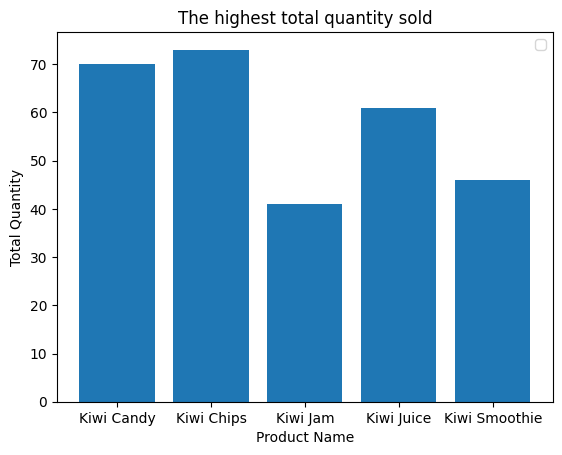

In [9]:
fig, ax = plt.subplots()

x = HighestTotalQuantitySold['product']
y = HighestTotalQuantitySold['Total Quantity']


# ax.bar(x, y, label=bar_labels, color=bar_colors)
ax.bar(x, y)

ax.set_xlabel('Product Name')
ax.set_ylabel('Total Quantity')

ax.set_title('The highest total quantity sold')
ax.legend()

plt.show()


---

<h2 style="color:#4d4dff;text-decoration: underline;">Which customer has the highest total spending across all orders?</h2>

In [10]:
"""
HighestTotalSpendingSold = df.groupby('customer_name', sort=True)["quantity"].sum().reset_index(name ='Total Spending')
HighestTotalSpendingSold

aggregated_data = df.groupby(['Team', 'Position']).agg(
    total_salary=('Salary', 'sum'),
    avg_salary=('Salary', 'mean'),
    player_count=('Name', 'count')
)

print(aggregated_data)
"""

"""
HighestTotalSpendingSold = df.groupby('customer_name').agg(
    Total_Spending=('quantity', 'sum')
)"""

# HighestTotalSpendingSold = df.groupby('customer_name', sort=False)["quantity"].sum().reset_index(name ='Total Spending')

"""
This would give you the top 5 largest:

# n  = number of rows you want to return
df.groupby(['user_id'])['amount'].sum().nlargest(n)
"""

HighestTotalSpendingSold = df.groupby('customer_name', sort=False)["quantity"].sum().nlargest(5).reset_index(name ='Total Spending')

HighestTotalSpendingSold

,customer_name,Total Spending
0,Eric,21
1,Ashley,15
2,James,12
3,Ryan,9
4,Bonnie,7


In [11]:
HighestTotalSpendingSold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_name   5 non-null      object
 1   Total Spending  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [12]:
HighestTotalSpendingSold.describe()

,Total Spending
count,5.000000
mean,12.800000
std,5.495453
min,7.000000
25%,9.000000
50%,12.000000
75%,15.000000
max,21.000000


C:\Users\MOSTAFA.GABER\AppData\Local\Temp\ipykernel_18048\797193201.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


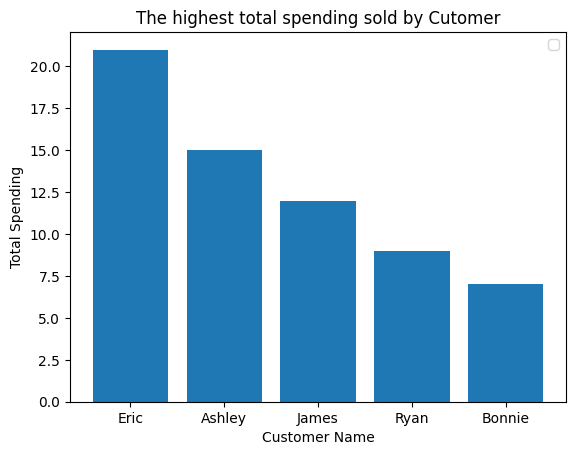

In [13]:
fig, ax = plt.subplots()

x = HighestTotalSpendingSold['customer_name']
y = HighestTotalSpendingSold['Total Spending']


# ax.bar(x, y, label=bar_labels, color=bar_colors)
ax.bar(x, y)

ax.set_xlabel('Customer Name')
ax.set_ylabel('Total Spending')

ax.set_title('The highest total spending sold by Cutomer')
ax.legend()

plt.show()